### Feature Engineering for Machine Learning in Python

Course Description

Every day you read about the amazing breakthroughs in how the newest applications of machine learning are changing the world. Often this reporting glosses over the fact that a huge amount of data munging and feature engineering must be done before any of these fancy models can be used. In this course, you will learn how to do just that. You will work with Stack Overflow Developers survey, and historic US presidential inauguration addresses, to understand how best to preprocess and engineer features from categorical, continuous, and unstructured data. This course will give you hands-on experience on how to prepare any data for your own machine learning models.

### MODULE 1

### Creating Features

In this chapter, you will explore what feature engineering is and how to get started with applying it to real-world data. You will load, explore and visualize a survey response dataset, and in doing so you will learn about its underlying data types and why they have an influence on how you should engineer your features. Using the pandas package you will create new features from both categorical and continuous columns.

In [1]:
## Getting to know your data

# Import pandas
import pandas as pd
so_survey_csv = "Combined_DS_v10.csv"

# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(so_survey_csv)

# Print the first five rows of the DataFrame
so_survey_df.head()


,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/2018 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/2018 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/2018 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/2018 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/2018 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [4]:
# Print the data type of each column
print(so_survey_df.dtypes)

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object


In [2]:
so_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             665 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
 10  RawSalary                   665 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.0+ KB


In [3]:
### Selecting specific data types

# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=['int64', 'float'])

# Print the column names contained in so_survey_df_num
print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


In [4]:
so_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ConvertedSalary             665 non-null    float64
 1   StackOverflowJobsRecommend  487 non-null    float64
 2   Age                         999 non-null    int64  
 3   Years Experience            999 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 31.3 KB


In [69]:
### One-hot encoding and dummy variables

# Create dummy variables for the Country column
dummy = pd.get_dummies(so_survey_df, columns=['Country'], drop_first=True, prefix='DM')

# Print the columns names
print(dummy.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')


In [6]:
### Dealing with uncommon categories

# Create a series out of the Country column
countries = so_survey_df['Country']

# Get the counts of each category
country_counts = countries.value_counts()

# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts < 100].index)

# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(pd.value_counts(countries))

Other           301
South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Name: Country, dtype: int64


D:\ProgramData\Anaconda3\envs\recsys\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [5]:
### Binarizing columns

# Create the Paid_Job column filled with zeros
so_survey_df['Paid_Job'] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df.loc[so_survey_df.ConvertedSalary > 0, 'Paid_Job'] = 1

# Print the first five rows of the columns
print(so_survey_df[['Paid_Job', 'ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
0         0              NaN
1         1          70841.0
2         0              NaN
3         1          21426.0
4         1          41671.0


In [7]:
### Binning values

# Import numpy
import numpy as np

# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 
                                         bins, labels=labels)

# Print the first 5 rows of the boundary_binned column
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())

  boundary_binned  ConvertedSalary
0             NaN              NaN
1          Medium          70841.0
2             NaN              NaN
3             Low          21426.0
4             Low          41671.0


### MODULE 2 

#### Dealing with Messy Data

This chapter introduces you to the reality of messy and incomplete data. You will learn how to find where your data has missing values and explore multiple approaches on how to deal with them. You will also use string manipulation techniques to deal with unwanted characters in your dataset.

In [73]:
## How sparse is my data?

# Subset the DataFrame
sub_df = so_survey_df[['Age', 'Gender']]

# Print the number of non-missing values
print(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Age       999 non-null int64
Gender    693 non-null object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


In [74]:
## Finding the missing values

# Print the top 10 entries of the DataFrame
print(sub_df.head(10))

# Print the locations of the missing values
print(sub_df.head(10).isnull())

# Print the locations of the non-missing values
print(sub_df.head(10).notnull())

   Age  Gender
0   21    Male
1   38    Male
2   45     NaN
3   46    Male
4   39    Male
5   39    Male
6   34    Male
7   24  Female
8   23    Male
9   36     NaN
     Age  Gender
0  False   False
1  False   False
2  False    True
3  False   False
4  False   False
5  False   False
6  False   False
7  False   False
8  False   False
9  False    True
    Age  Gender
0  True    True
1  True    True
2  True   False
3  True    True
4  True    True
5  True    True
6  True    True
7  True    True
8  True    True
9  True   False


In [75]:
### Listwise deletion

##1
# Print the number of rows and columns
print(so_survey_df.shape)

##2
# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = so_survey_df.dropna(how='any')

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

##3
# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how='any', axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

##4
# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(how='all', subset=['Gender'])

# Print the shape of the new DataFrame
print(no_gender.shape)

(999, 13)
(264, 13)
(999, 8)
(693, 13)


In [76]:
## Replacing missing values with constants

# Replace missing values
so_survey_df['Gender'].fillna('Not Given', inplace=True)

# Print the count of each value
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Transgender                                                                    2
Female;Male                                                                    2
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Name: Gender, dtype: int64


In [77]:
## Filling continuous missing values

# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend'] = round(so_survey_df['StackOverflowJobsRecommend'])

# Print the top 5 rows
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [78]:
## Dealing with stray characters (I)

# Remove the commas in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')

# Remove the dollar signs in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')

In [79]:
## Dealing with stray characters (II)

# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# Find the indexes of missing values
idx = numeric_vals.isna()

# Print the relevant rows
print(so_survey_df['RawSalary'][idx])

# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£','')

# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype(float)

# Print the column
print(so_survey_df['RawSalary'])

0            NaN
2            NaN
4      £41671.00
6            NaN
8            NaN
         ...    
989          NaN
990          NaN
992          NaN
994          NaN
997          NaN
Name: RawSalary, Length: 401, dtype: object
0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


In [80]:
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype(str)

In [81]:
# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace("£",'')

# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype(float)

# Print the column
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


In [82]:
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype(str)

In [83]:
## Method chaining

# Use method chaining
so_survey_df['RawSalary'] = so_survey_df['RawSalary']\
                              .str.replace(",",'')\
                              .str.replace("$",'')\
                              .str.replace("£",'')\
                              .astype(float)
 
# Print the RawSalary column
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


### MODULE 3

## Conforming to Statistical Assumptions

In this chapter, you will focus on analyzing the underlying distribution of your data and whether it will impact your machine learning pipeline. You will learn how to deal with skewed data and situations where outliers may be negatively impacting your analysis.

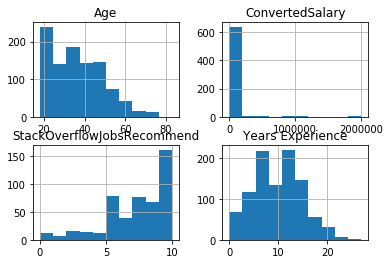

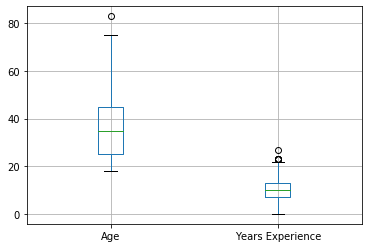

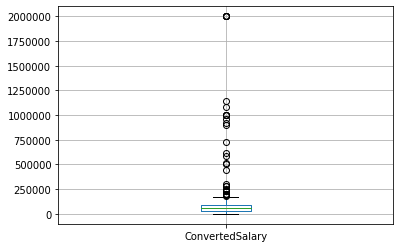

In [84]:
## What does your data look like? (I)
import matplotlib.pyplot as plt

# Create a histogram
so_numeric_df.hist()
plt.show()

# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

# Create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

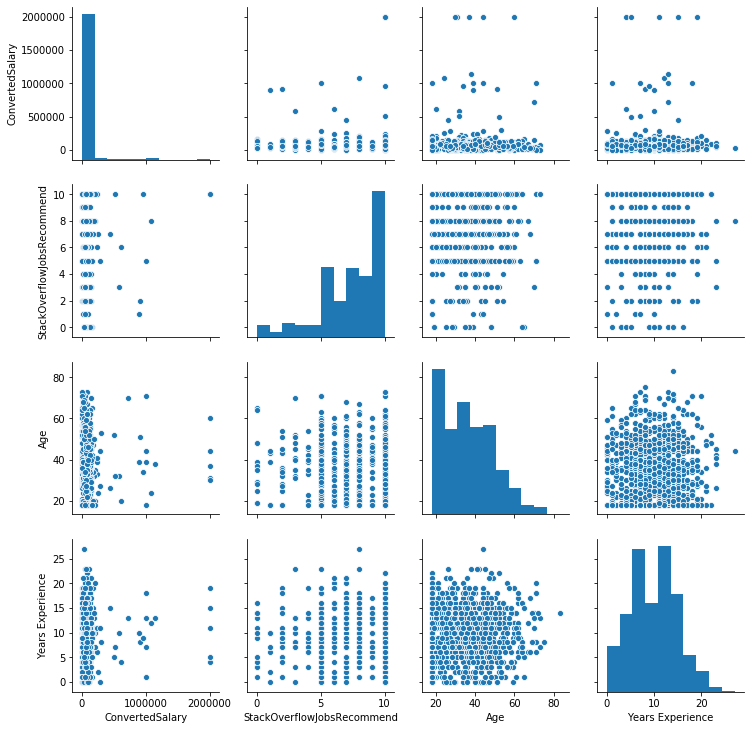

       ConvertedSalary  StackOverflowJobsRecommend         Age  \
count     6.650000e+02                  487.000000  999.000000   
mean      9.256517e+04                    7.061602   36.003003   
std       2.091344e+05                    2.621591   13.255127   
min       0.000000e+00                    0.000000   18.000000   
25%       2.755000e+04                    5.000000   25.000000   
50%       5.556200e+04                    7.000000   35.000000   
75%       8.823800e+04                   10.000000   45.000000   
max       2.000000e+06                   10.000000   83.000000   

       Years Experience  
count        999.000000  
mean           9.961962  
std            4.878129  
min            0.000000  
25%            7.000000  
50%           10.000000  
75%           13.000000  
max           27.000000  


In [85]:
### What does your data look like? (II)

# Import packages
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pairwise relationships
sns.pairplot(so_numeric_df)

# Show plot
plt.show()


# Print summary statistics
print(so_numeric_df.describe())

In [86]:
## Normalization

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

# <script.py> output:
#          Age_MM  Age
#     0  0.046154   21
#     1  0.307692   38
#     2  0.415385   45
#     3  0.430769   46
#     4  0.323077   39

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


d:\programdata\anaconda3\envs\recsys\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [87]:
## Standardization

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())

# <script.py> output:
#          Age_SS  Age
#     0 -1.132431   21
#     1  0.150734   38
#     2  0.679096   45
#     3  0.754576   46
#     4  0.226214   39

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


d:\programdata\anaconda3\envs\recsys\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


d:\programdata\anaconda3\envs\recsys\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


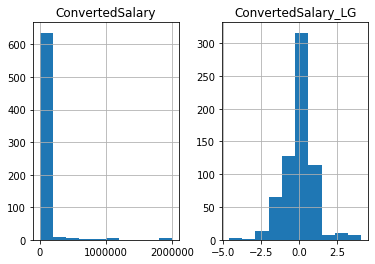

In [88]:
## Log transformation

# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

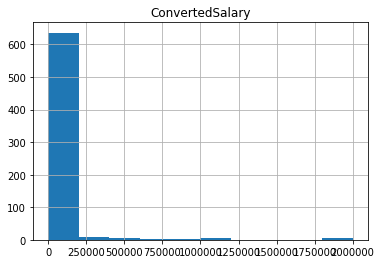

<Figure size 432x288 with 0 Axes>

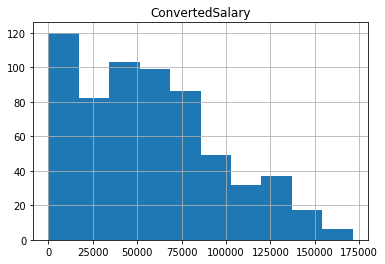

In [89]:
## Percentage based outlier removal

# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

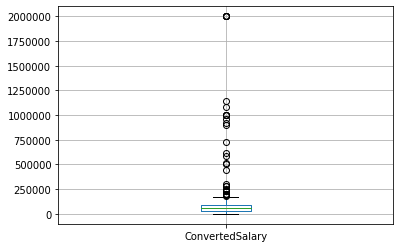

In [93]:
## Statistical outlier removal

# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] > lower)]
#trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < lower) & (so_numeric_df['ConvertedSalary'] > upper)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

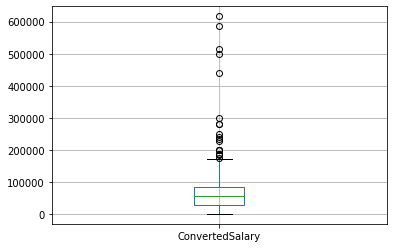

In [94]:
## Statistical outlier removal

# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

In [99]:
## Train and testing transformations (I)

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the test data using the fitted scaler
so_numeric_df['Age_ss'] = SS_scaler.transform(so_numeric_df[['Age']])
print(so_numeric_df[['Age', 'Age_ss']].head())

   Age    Age_ss
0   21 -1.132431
1   38  0.150734
2   45  0.679096
3   46  0.754576
4   39  0.226214


d:\programdata\anaconda3\envs\recsys\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [100]:
## Train and testing transformations (II)

train_std = so_numeric_df['ConvertedSalary'].std()
train_mean = so_numeric_df['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < train_upper) \
                             & (so_numeric_df['ConvertedSalary'] > train_lower)]

### MODULE 4

### Dealing with Text Data


Finally, in this chapter, you will work with unstructured text data, understanding ways in which you can engineer columnar features out of a text corpus. You will compare how different approaches may impact how much context is being extracted from a text, and how to balance the need for context, without too many features being created.

In [14]:
speech_csv = "inaugural_speeches.csv"

# Import so_survey_csv into so_survey_df
speech_df = pd.read_csv(speech_csv)

# Print the first five rows of the DataFrame
speech_df.head()

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t..."
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica..."


In [15]:
speech_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
Name                 58 non-null object
Inaugural Address    58 non-null object
Date                 58 non-null object
text                 58 non-null object
dtypes: object(4)
memory usage: 1.9+ KB


In [9]:
## Cleaning up your text

# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

# Print the first 5 rows of the text_clean column
print(speech_df['text_clean'].head())

0    fellow citizens of the senate and of the house...
1    fellow citizens   i am again called upon by th...
2    when it was first perceived  in early times  t...
3    friends and fellow citizens   called upon to u...
4    proceeding  fellow citizens  to that qualifica...
Name: text_clean, dtype: object


In [10]:
## High level text features

# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

# Find the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

# Print the first 5 rows of these columns
print(speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']])

                                           text_clean  char_cnt  word_cnt  \
0   fellow citizens of the senate and of the house...      8616      1432   
1   fellow citizens   i am again called upon by th...       787       135   
2   when it was first perceived  in early times  t...     13871      2323   
3   friends and fellow citizens   called upon to u...     10144      1736   
4   proceeding  fellow citizens  to that qualifica...     12902      2169   
5   unwilling to depart from examples of the most ...      7003      1179   
6   about to add the solemnity of an oath to the o...      7148      1211   
7   i should be destitute of feeling if i was not ...     19894      3382   
8   fellow citizens   i shall not attempt to descr...     26322      4466   
9   in compliance with an usage coeval with the ex...     17753      2922   
10  fellow citizens   about to undertake the arduo...      6818      1130   
11  fellow citizens   the will of the american peo...      7061      1179   

In [12]:
# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

# Find the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

# Print the first 5 rows of these columns
speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']].head()

,text_clean,char_cnt,word_cnt,avg_word_length
0,fellow citizens of the senate and of the house...,8616,1432,6.016760
1,fellow citizens i am again called upon by th...,787,135,5.829630
2,when it was first perceived in early times t...,13871,2323,5.971158
3,friends and fellow citizens called upon to u...,10144,1736,5.843318
4,proceeding fellow citizens to that qualifica...,12902,2169,5.948363


In [106]:
## Counting words (I)

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
cv = CountVectorizer()

# Fit the vectorizer
cv.fit(speech_df['text_clean'])

# Print feature names
print(cv.get_feature_names())

['abandon', 'abandoned', 'abandonment', 'abate', 'abdicated', 'abeyance', 'abhorring', 'abide', 'abiding', 'abilities', 'ability', 'abject', 'able', 'ably', 'abnormal', 'abode', 'abolish', 'abolished', 'abolishing', 'aboriginal', 'aborigines', 'abound', 'abounding', 'abounds', 'about', 'above', 'abraham', 'abreast', 'abridging', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absolutism', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'abstain', 'abstaining', 'abstract', 'abstractions', 'absurd', 'abundance', 'abundant', 'abundantly', 'abuse', 'abused', 'abuses', 'academies', 'accept', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accession', 'accident', 'accidental', 'accidents', 'acclaim', 'accommodation', 'accommodations', 'accompanied', 'accompany', 'accomplish', 'accomplished', 'accomplishing', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'accorded', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountab

In [107]:
## Counting words (II)

# Apply the vectorizer
cv_transformed = cv.transform(speech_df['text_clean'])

# Print the full array
cv_array = cv_transformed.toarray()

# Print the shape of cv_array
print(cv_array.shape)

(58, 9043)


In [108]:
## Limiting your features

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df=.2, max_df=.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the array shape
print(cv_array.shape)

(58, 818)


In [109]:
## Text to DataFrame

# Create a DataFrame with these features
cv_df = pd.DataFrame(data=cv_array, 
                     columns=cv.get_feature_names()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
print(speech_df_new.head())


                Name         Inaugural Address                      Date  \
0  George Washington   First Inaugural Address  Thursday, April 30, 1789   
1  George Washington  Second Inaugural Address     Monday, March 4, 1793   
2         John Adams         Inaugural Address   Saturday, March 4, 1797   
3   Thomas Jefferson   First Inaugural Address  Wednesday, March 4, 1801   
4   Thomas Jefferson  Second Inaugural Address     Monday, March 4, 1805   

                                                text  \
0  Fellow-Citizens of the Senate and of the House...   
1  Fellow Citizens:  I AM again called upon by th...   
2  WHEN it was first perceived, in early times, t...   
3  Friends and Fellow-Citizens:  CALLED upon to u...   
4  PROCEEDING, fellow-citizens, to that qualifica...   

                                          text_clean  char_cnt  word_cnt  \
0  fellow citizens of the senate and of the house...      8616      1432   
1  fellow citizens   i am again called upon by th...  

In [110]:
## Tf-idf

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(tv_df.head())

   TFIDF_action  TFIDF_administration  TFIDF_america  TFIDF_american  \
0      0.000000              0.133415       0.000000        0.105388   
1      0.000000              0.261016       0.266097        0.000000   
2      0.000000              0.092436       0.157058        0.073018   
3      0.000000              0.092693       0.000000        0.000000   
4      0.041334              0.039761       0.000000        0.031408   

   TFIDF_americans  TFIDF_believe  TFIDF_best  TFIDF_better  TFIDF_change  \
0              0.0       0.000000    0.000000      0.000000      0.000000   
1              0.0       0.000000    0.000000      0.000000      0.000000   
2              0.0       0.000000    0.026112      0.060460      0.000000   
3              0.0       0.090942    0.117831      0.045471      0.053335   
4              0.0       0.000000    0.067393      0.039011      0.091514   

   TFIDF_citizens  ...  TFIDF_things  TFIDF_time  TFIDF_today  TFIDF_union  \
0        0.229644  ...    

In [111]:
## Inspecting Tf-idf values

# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_citizens      0.229644
Name: 0, dtype: float64


In [123]:
train_speech_df = speech_df[:50]
test_speech_df = speech_df[50:]

In [124]:
## Transforming unseen data

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(train_speech_df['text_clean'])

# Transform test data
test_tv_transformed = tv.transform(test_speech_df['text_clean'])

# Create new features for the test set
test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), 
                          columns=tv.get_feature_names()).add_prefix('TFIDF_')

print(test_tv_df.head())

   TFIDF_action  TFIDF_administration  TFIDF_america  TFIDF_american  \
0      0.069078                   0.0       0.259178        0.054648   
1      0.000000                   0.0       0.637038        0.104471   
2      0.000000                   0.0       0.417105        0.184688   
3      0.000000                   0.0       0.499911        0.134153   
4      0.000000                   0.0       0.499404        0.036855   

   TFIDF_believe  TFIDF_best  TFIDF_better  TFIDF_business  TFIDF_citizens  \
0       0.000000    0.027324      0.165151        0.000000        0.046581   
1       0.000000    0.026118      0.094716        0.043573        0.066787   
2       0.000000    0.000000      0.099226        0.000000        0.122441   
3       0.079328    0.134153      0.000000        0.000000        0.257287   
4       0.043586    0.036855      0.000000        0.000000        0.094243   

   TFIDF_come  ...  TFIDF_strength  TFIDF_support  TFIDF_time  TFIDF_union  \
0    0.064629  ...  

In [125]:
## Using longer n-grams

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range=(3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

['0092 ideal freedom', 'ability preserve protect', 'agriculture commerce manufactures', 'america 0092 ideal', 'best ability preserve', 'best interests country', 'bless god bless', 'bless united states', 'chief justice mr', 'children children children', 'citizens united states', 'civil religious liberty', 'commerce united states', 'concern thank god', 'confidence fellow citizens', 'congress extraordinary session', 'constitution does expressly', 'constitution united states', 'coordinate branches government', 'day task people', 'defend constitution united', 'desire determined work', 'distinguished guests fellow', 'does expressly say', 'equal exact justice', 'era good feeling', 'executive branch government', 'faithfully execute office', 'fellow citizens assembled', 'fellow citizens called', 'fellow citizens large', 'fellow citizens world', 'form perfect union', 'general welfare secure', 'god bless america', 'god bless god', 'good greatest number', 'government united states', 'granted feder

In [126]:
## Finding the most common words

# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

Counts_constitution united states    20
Counts_people united states          13
Counts_preserve protect defend       10
Counts_mr chief justice              10
Counts_president united states        8
dtype: int64
